# Introduction

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many waterpoints already established in the country, but some are in need of repair while others have failed altogether. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

# Exploratory Data Analysis

### Importing the [Tanzanian Water Well Data](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/)

In [1]:
import pandas as pd

# Training_set_labels = The dependent variable ['status_group'] for each of the rows in Training_set_values
original_y = pd.read_csv('Data/Training_set_labels.csv')

# Training_set_values = The independent variables for the training set
original_X = pd.read_csv('Data/Training_set_values.csv')

### Exploring the Dependent Variables

In [2]:
original_y.nunique()

id              59400
status_group        3
dtype: int64

In [3]:
original_y['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

### Exploring the Independent Variables

In [4]:
original_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

### Exploring Smaller DataFrames by Category

In [5]:
df = original_X.merge(original_y, on='id', how='outer')
len(df.columns)
# Merging independent and dependent dataframes should yield 41 columns.

41

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_target_bar_graph(category, target, plotname):
    
    # Function created to plot functionality dependent on any variable in the DataFrame
    
    # category = df_independent variable
    # target = df_dependent variable (status)
    # plotname = df_independent plot title

    set_labels = category.unique()
    bar_labels = target.unique()
    bar = {}
    for i in range(len(bar_labels)):
        bar[i] = {}
        for j in set_labels:
            bar[i][j] = 0
        
    count = 0
    for k in category:
        if target[count] == bar_labels[0]:
            bar[0][k] = bar[0][k] + 1
        elif target[count] == bar_labels[1]:
            bar[1][k] = bar[1][k] + 1
        else:
            bar[2][k] = bar[2][k] + 1
        count += 1

    x = np.arange(len(set_labels))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots()
    ax.bar(x - width/2, list(bar[0].values()), width, label=bar_labels[0], color='royalblue') #bar1
    ax.bar(x,           list(bar[1].values()), width, label=bar_labels[1], color='black') #bar2
    ax.bar(x + width/2, list(bar[2].values()), width, label=bar_labels[2], color='lightblue') #bar3

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of Waterpoints')
    ax.set_title(f'Amount of Waterpoints by {plotname}')
    ax.set_xticks(x)
    ax.set_xticklabels(set_labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

In [7]:
List_ = []
List_.append(40)

#### Time Related: date_recorded, construction_year

In [8]:
df_time = df.iloc[:, [2, 23, 40]].copy()
print(df_time.info())
df_time.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date_recorded      59400 non-null  object
 1   construction_year  59400 non-null  int64 
 2   status_group       59400 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.8+ MB
None


date_recorded        356
construction_year     55
status_group           3
dtype: int64

In [9]:
df_time['date_recorded'] = pd.to_datetime(df_time['date_recorded'], format='%Y-%m-%d')
df_time['year_recorded'] = pd.DatetimeIndex(df_time['date_recorded']).year
df_time.year_recorded.value_counts()

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: year_recorded, dtype: int64

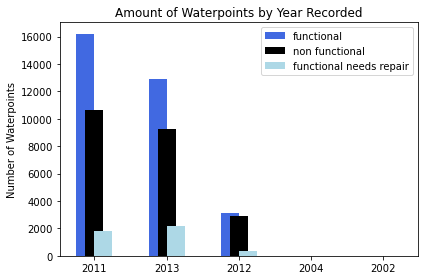

In [10]:
plot_target_bar_graph(df_time.year_recorded, df_time.status_group, 'Year Recorded')

In [11]:
df_time.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [12]:
counter = 0
for year in df_time['construction_year']:
    if year >= 2010:
        df_time.loc[counter, 'construction_decade'] = 'After_2010'
    elif year >= 2000:
        df_time.loc[counter, 'construction_decade'] = '2000-2009'
    elif year >= 1990:
        df_time.loc[counter, 'construction_decade'] = '1990-1999'
    elif year >= 1980:
        df_time.loc[counter, 'construction_decade'] = '1980-1989'
    elif year >= 1970:
        df_time.loc[counter, 'construction_decade'] = '1970-1979'
    elif year >= 1960:
        df_time.loc[counter, 'construction_decade'] = '1960-1969'
    else:
        df_time.loc[counter, 'construction_decade'] = 'unknown'
    counter += 1

In [13]:
df_time.construction_decade.value_counts()

unknown       20709
2000-2009     15330
1990-1999      7678
1980-1989      5578
After_2010     5161
1970-1979      4406
1960-1969       538
Name: construction_decade, dtype: int64

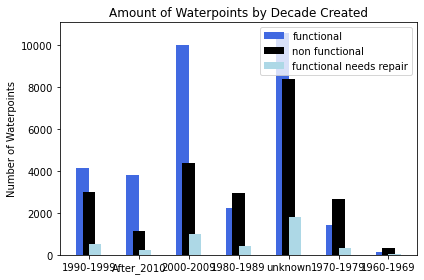

In [14]:
plot_target_bar_graph(df_time.construction_decade, df_time.status_group, 'Decade Created')

The year_recorded information will not be further explored in the dataset used for modeling because there is no distinct relationship found in the plots that compare the functionality of the waterpoints versus the time the information was recorded. However, there is an interesting relationship between the functionality of the waterpoints and the decade in which they were created. The data may be further explored after analyzing other data points and the unknown values are processed.

In [15]:
List_.append(23)

#### Geographical Descriptions: gps_height, longitude, latitude

In [16]:
df_geographical = df.iloc[:, [4, 6, 7, 40]].copy()
df_geographical.head()

,gps_height,longitude,latitude,status_group
0,1390,34.938093,-9.856322,functional
1,1399,34.698766,-2.147466,functional
2,686,37.460664,-3.821329,functional
3,263,38.486161,-11.155298,non functional
4,0,31.130847,-1.825359,functional


In [17]:
# Intial plot showed an outlier where long/lat = 0.
df.loc[df['longitude']==0].head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,...,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,functional
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,...,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
177,56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
253,13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair


In [18]:
# Dropping outlier for a better plot.
df_geographical = df_geographical[df_geographical.longitude != 0]

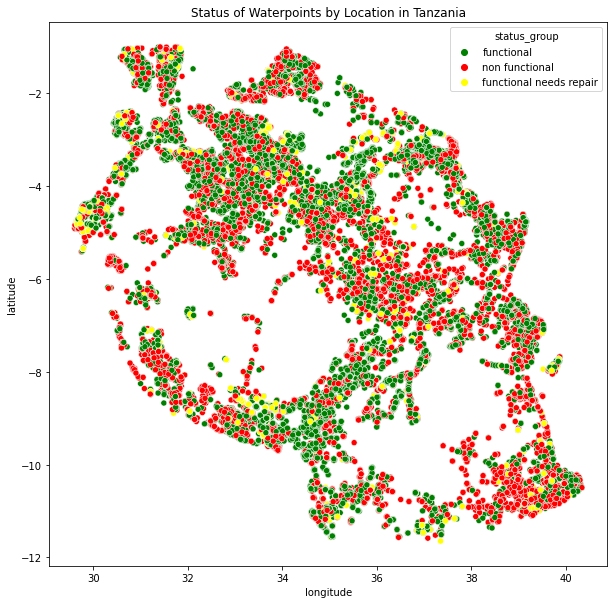

In [19]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_geographical,x='longitude', y='latitude', hue='status_group', palette=['green', 'red', 'yellow'])
plt.title('Status of Waterpoints by Location in Tanzania')
plt.show()

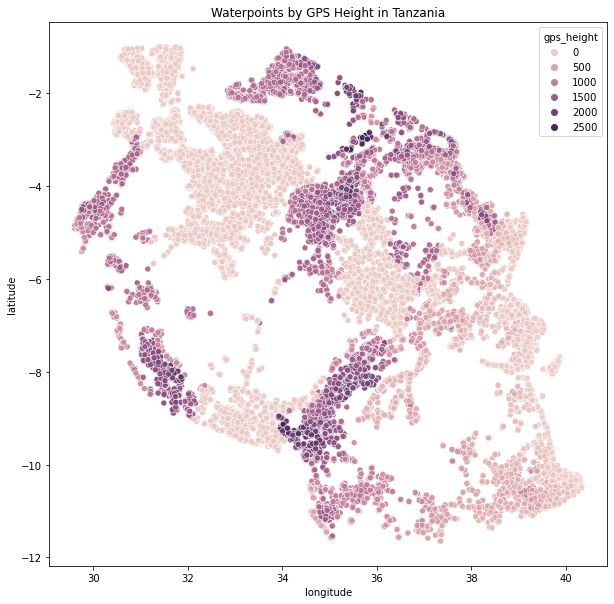

In [20]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_geographical,x='longitude', y='latitude', hue='gps_height')
plt.title('Waterpoints by GPS Height in Tanzania')
plt.show()

The geographical information provided will not be further explored in the dataset used for modeling. The status of the waterpoints seem to be evenly distributed throughout Tanzania. Other location and population data may show more correlation.

#### Location Information: subvillage, region, region_code, district_code, lga, ward

In [21]:
df_location = df.iloc[:, [11, 12, 13, 14, 15, 16, 40]].copy()
df_location.head()

,subvillage,region,region_code,district_code,lga,ward,status_group
0,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,functional
1,Nyamara,Mara,20,2,Serengeti,Natta,functional
2,Majengo,Manyara,21,4,Simanjiro,Ngorika,functional
3,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,non functional
4,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,functional


In [22]:
df_location.nunique()

subvillage       19287
region              21
region_code         27
district_code       20
lga                125
ward              2092
status_group         3
dtype: int64

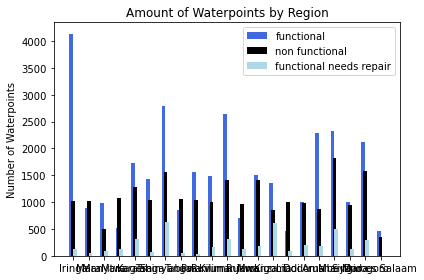

In [23]:
plot_target_bar_graph(df_location.region, df_time.status_group, 'Region')

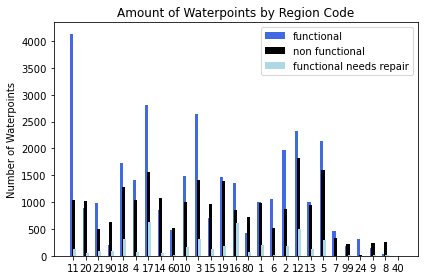

In [24]:
plot_target_bar_graph(df_location.region_code, df_time.status_group, 'Region Code')

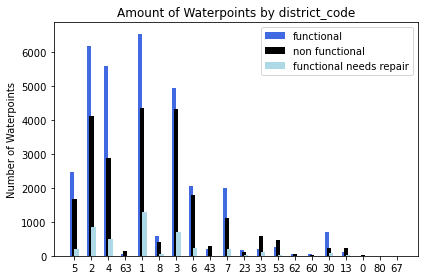

In [25]:
plot_target_bar_graph(df_location.district_code, df_time.status_group, 'district_code')

There seems to be a relationship between the regions and districts of Tanzania and waterpoint functionality. Greater differences between functionalities are shown when the data is organized by region and region code.  If the resulting data seems overfitted, these location variables may be revisited.

In [26]:
List_.append(12)

#### Community/Interaction Information: population, public_meeting

In [27]:
df_community = df.iloc[:, [17, 18, 40]].copy()
df_community.head()

,population,public_meeting,status_group
0,109,True,functional
1,280,NaN,functional
2,250,True,functional
3,58,True,non functional
4,0,True,functional


In [28]:
df_community.population.describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [29]:
counter = 0
for pop in df_community['population']:
    if pop >= (0.5*30500):
        df_community.loc[counter, 'percentage'] = '50-100'
    elif pop >= (0.4*30500):
        df_community.loc[counter, 'percentage'] = '40-49'
    elif pop >= (0.3*30500):
        df_community.loc[counter, 'percentage'] = '30-39'
    elif pop >= (0.2*30500):
        df_community.loc[counter, 'percentage'] = '20-29'
    elif pop >= (0.1*30500):
        df_community.loc[counter, 'percentage'] = '10-19'
    elif pop >= (0.08*30500):
        df_community.loc[counter, 'percentage'] = '8-9'
    elif pop >= (0.06*30500):
        df_community.loc[counter, 'percentage'] = '6-7'
    elif pop >= (0.04*30500):
        df_community.loc[counter, 'percentage'] = '4-5'
    elif pop >= (0.02*30500):
        df_community.loc[counter, 'percentage'] = '2-3'
    else:
        df_community.loc[counter, 'percentage'] = '< 2'
    counter += 1

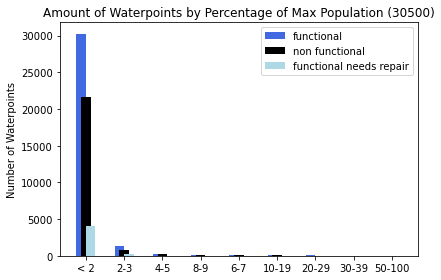

In [30]:
plot_target_bar_graph(df_community.percentage, df_time.status_group, 'Percentage of Max Population (30500)')

In [31]:
df_community['public_meeting'] = df_community['public_meeting'].fillna('unknown')
df_community['public_meeting'] = df_community['public_meeting'].astype(str)

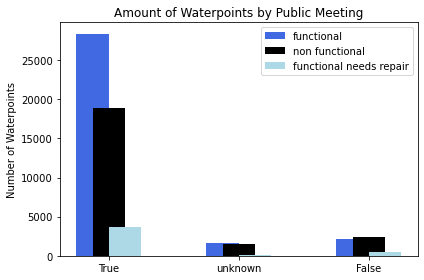

In [32]:
plot_target_bar_graph(df_community.public_meeting, df_time.status_group, 'Public Meeting')

Population classification doesn't seem to yield a visible relationship within the data. Public meeting data seems to show some differences between the functional and non functional water points. It is important, though, to consider that the waterpoint's functionality may drive the reason why it is a point of public meeting.

In [33]:
List_.append(18)

#### Management (From Creation To Current): funder, installer, scheme_management, scheme_name, management, management_group

In [34]:
df_management = df.iloc[:, [3, 5, 20, 21, 27, 28, 40]].copy()
df_management.head()

,funder,installer,scheme_management,scheme_name,management,management_group,status_group
0,Roman,Roman,VWC,Roman,vwc,user-group,functional
1,Grumeti,GRUMETI,Other,NaN,wug,user-group,functional
2,Lottery Club,World vision,VWC,Nyumba ya mungu pipe scheme,vwc,user-group,functional
3,Unicef,UNICEF,VWC,NaN,vwc,user-group,non functional
4,Action In A,Artisan,NaN,NaN,other,other,functional


In [35]:
df_management.nunique()

funder               1897
installer            2145
scheme_management      12
scheme_name          2696
management             12
management_group        5
status_group            3
dtype: int64

In [36]:
print(df_management.scheme_management.isnull().sum())
print(df_management.management.isnull().sum())

3877
0


In [37]:
print(df_management.funder.isnull().sum())
print(df_management.installer.isnull().sum())

3635
3655


In [38]:
df_management.funder = df_management.funder.replace(' ', '', regex=True)
df_management.funder = df_management.funder.str.lower()
data = df_management.funder.value_counts()
group = []
for i in data:
    if i > 500:
        group.append(i)        
savelist = data.index[0:19]
data.head(20)

governmentoftanzania    9084
danida                  3114
hesawa                  2202
rwssp                   1374
worldbank               1349
kkkt                    1287
worldvision             1247
unicef                  1057
tasaf                    877
districtcouncil          843
dhv                      829
privateindividual        826
dwsp                     811
0                        777
norad                    765
germanyrepubli           610
tcrs                     602
ministryofwater          590
water                    583
dwe                      484
Name: funder, dtype: int64

In [39]:
counter = 0
for j in df_management['funder']:
    if j in savelist:
        df_management.loc[counter, 'funded'] = j
    else:
        df_management.loc[counter, 'funded'] = 'insignificant'
    counter += 1

In [40]:
df_management.funded.value_counts()

insignificant           30573
governmentoftanzania     9084
danida                   3114
hesawa                   2202
rwssp                    1374
worldbank                1349
kkkt                     1287
worldvision              1247
unicef                   1057
tasaf                     877
districtcouncil           843
dhv                       829
privateindividual         826
dwsp                      811
0                         777
norad                     765
germanyrepubli            610
tcrs                      602
ministryofwater           590
water                     583
Name: funded, dtype: int64

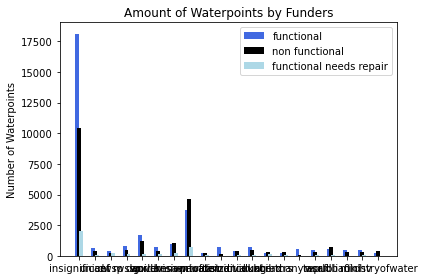

In [41]:
plot_target_bar_graph(df_management.funded, df_management.status_group, 'Funders')

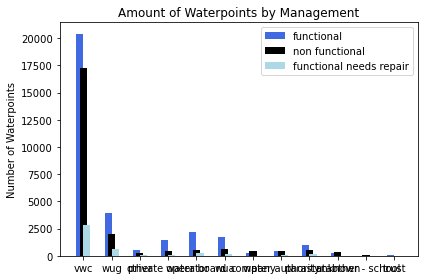

In [42]:
plot_target_bar_graph(df_management.management, df_management.status_group, 'Management')

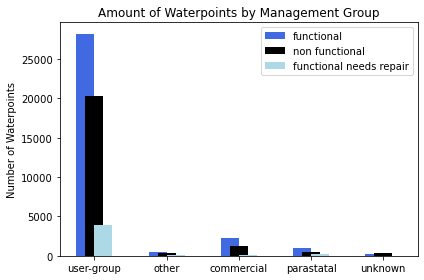

In [43]:
plot_target_bar_graph(df_management.management_group, df_management.status_group, 'Management Group')

When exploring the data by funder/installer, the observation shows that government funded waterpoints are more not functional than they are functional. But because the insignificantly funded waterpoints outweigh the top data, funders/installers will not be used in the final training data set. There is greater disparities when the data is broken down by management over the grouped managements, therefore management will be further explored in the final dataset.

In [44]:
List_.append(27)

#### Extraction Type: _type, _type_group, _type_class

In [45]:
df_extraction = df.iloc[:, [24, 25, 26, 40]].copy()
df_extraction.nunique()

extraction_type          18
extraction_type_group    13
extraction_type_class     7
status_group              3
dtype: int64

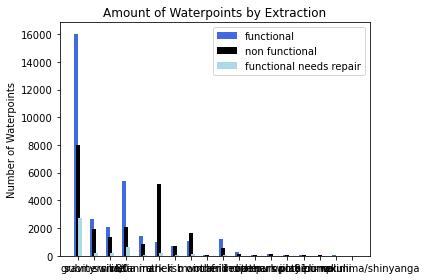

In [46]:
plot_target_bar_graph(df_extraction.extraction_type, df_extraction.status_group, 'Extraction')

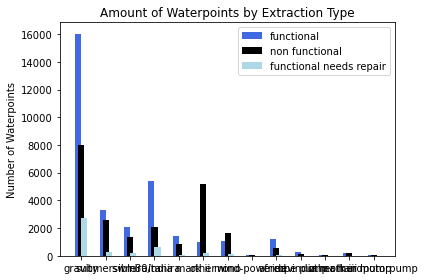

In [47]:
plot_target_bar_graph(df_extraction.extraction_type_group, df_extraction.status_group, 'Extraction Type')

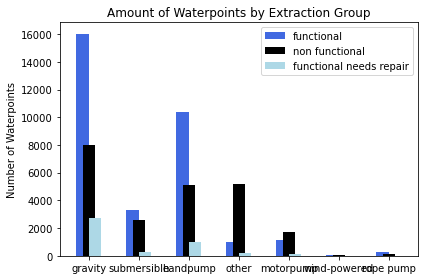

In [48]:
plot_target_bar_graph(df_extraction.extraction_type_class, df_extraction.status_group, 'Extraction Group')

The more the classifiers are grouped, the more even the polar differences within the functionality by extraction type becomes. But the theme of gravity out performing other extraction methods carry through.

In [49]:
List_.append(26)

#### Source Type: source, _type, _class

In [50]:
df_source = df.iloc[:, [35, 36, 37, 40]].copy()
df_source.nunique()

source          10
source_type      7
source_class     3
status_group     3
dtype: int64

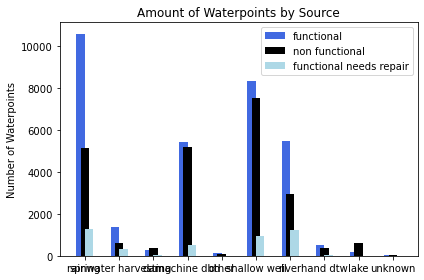

In [51]:
plot_target_bar_graph(df_source.source, df_source.status_group, 'Source')

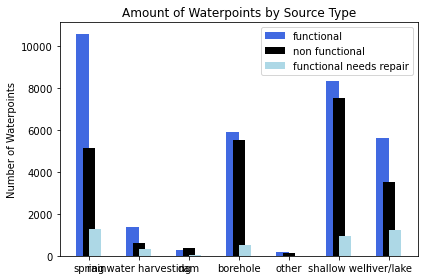

In [52]:
plot_target_bar_graph(df_source.source_type, df_source.status_group, 'Source Type')

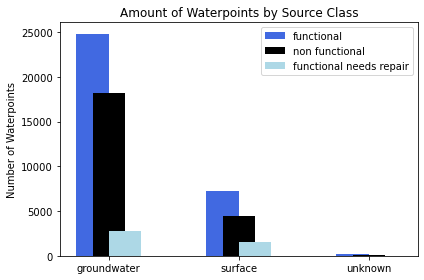

In [53]:
plot_target_bar_graph(df_source.source_class, df_source.status_group, 'Source Class')

The slight nuances smooths out the more the classifiers are grouped together. To carry over the differences, the source type will be taken into consideration.

In [54]:
List_.append(35)

#### Quality of Water: water_quality, quality_group

In [55]:
df_quality = df.iloc[:, [31, 32, 40]].copy()
df_quality.nunique()

water_quality    8
quality_group    6
status_group     3
dtype: int64

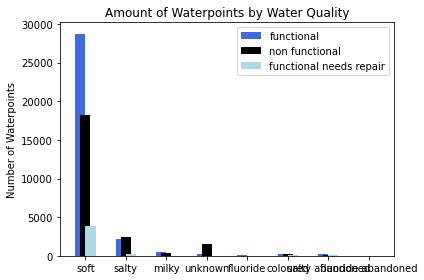

In [56]:
plot_target_bar_graph(df_quality.water_quality, df_quality.status_group, 'Water Quality')

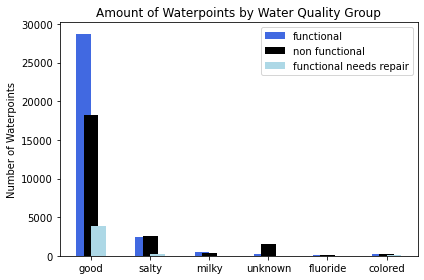

In [57]:
plot_target_bar_graph(df_quality.quality_group, df_quality.status_group, 'Water Quality Group')

Functionality by water quality seems to be most affected by whether it is good or of unknown origin.

In [58]:
List_.append(32)

#### Quantity of Water: amount_tsh, quantity, _group,

In [59]:
df_quantity = df.iloc[:, [1, 33, 34, 40]].copy()
df_quantity.nunique()

amount_tsh        98
quantity           5
quantity_group     5
status_group       3
dtype: int64

In [60]:
df_quantity.amount_tsh.describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [61]:
counter = 0
for amount in df_quantity['amount_tsh']:
    if amount >= 100000:
        df_quantity.loc[counter, 'amount'] = '>=100000'
    elif amount >= 50000:
        df_quantity.loc[counter, 'amount'] = '>=50000'
    elif amount >= 1000:
        df_quantity.loc[counter, 'amount'] = '>=1000'
    elif amount >= 500:
        df_quantity.loc[counter, 'amount'] = '>=500'
    elif amount >= 100:
        df_quantity.loc[counter, 'amount'] = '>=100'
    elif amount == 0:
        df_quantity.loc[counter, 'amount'] = '0/unknown'
    else:
        df_quantity.loc[counter, 'amount'] = 'insignificant'
    counter += 1

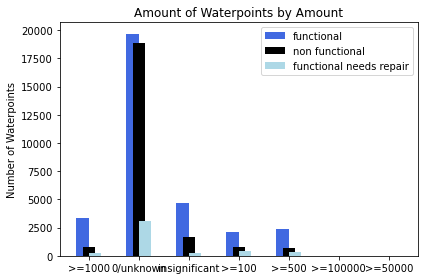

In [62]:
plot_target_bar_graph(df_quantity.amount, df_quantity.status_group, 'Amount')

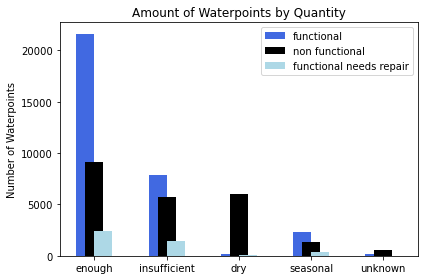

In [63]:
plot_target_bar_graph(df_quantity.quantity, df_quantity.status_group, 'Quantity')

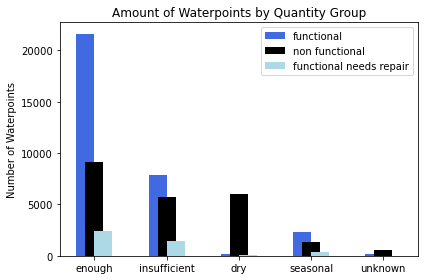

In [64]:
plot_target_bar_graph(df_quantity.quantity_group, df_quantity.status_group, 'Quantity Group')

There are too many unknown variables in the water quantity when exact amounts are given, thus skewing the data. Therefore only the quantities by classification type will be utilized.

In [65]:
List_.append(33)

#### Waterpoint Type: waterpoint_type, _type_group

In [66]:
df_waterpoint = df.iloc[:, [38, 39, 40]].copy()
df_waterpoint.nunique()

waterpoint_type          7
waterpoint_type_group    6
status_group             3
dtype: int64

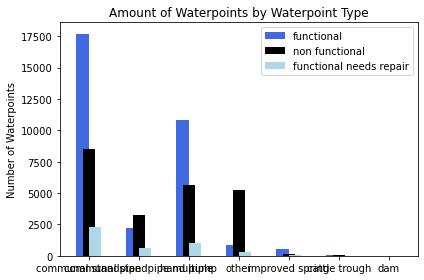

In [67]:
plot_target_bar_graph(df_waterpoint.waterpoint_type, df_waterpoint.status_group, 'Waterpoint Type')

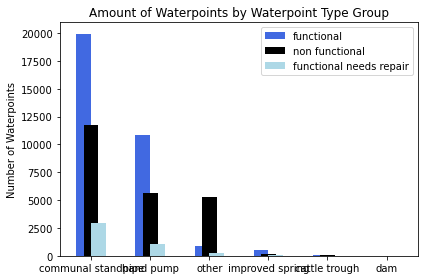

In [68]:
plot_target_bar_graph(df_waterpoint.waterpoint_type_group, df_waterpoint.status_group, 'Waterpoint Type Group')

It seems the two most common style of waterpoint types are communal standpipes or pumps, which explains the rather mostly functional data that is shown between the two groups and other methods are normally don't work (other than improved springs which is separated out from the "other" classification.

In [69]:
List_.append(39)

#### Misc. Information: wpt_name, num_private, basin, permit, payment, payment_type

In [70]:
df_misc = df.iloc[:, [0, 8, 9, 10, 22, 29, 30, 40]].copy()
df_misc.nunique()

id              59400
wpt_name        37400
num_private        65
basin               9
permit              2
payment             7
payment_type        7
status_group        3
dtype: int64

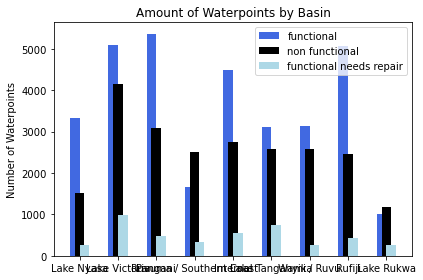

In [71]:
plot_target_bar_graph(df_misc.basin, df_misc.status_group, 'Basin')

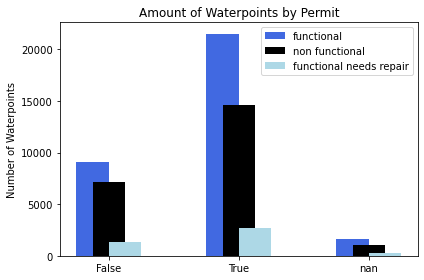

In [72]:
plot_target_bar_graph(df_misc.permit, df_misc.status_group, 'Permit')

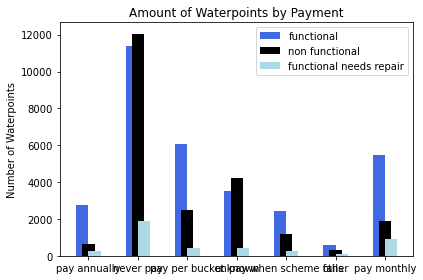

In [73]:
plot_target_bar_graph(df_misc.payment, df_misc.status_group, 'Payment')

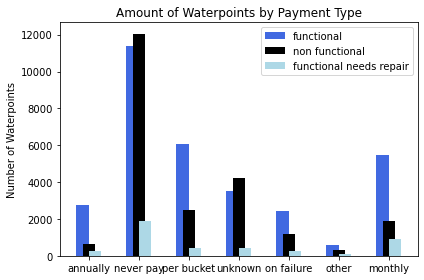

In [74]:
plot_target_bar_graph(df_misc.payment_type, df_misc.status_group, 'Payment Type')

The final data set will disregard the id, wpt_name, and num_private since there are no classifications unique within these sets. The final data set will include the basin, permit, and payment sections as they show significant differences within the classification groups.

In [75]:
List_.append(10)
List_.append(22)
List_.append(29)

# Final DataFrame

### Combining Chosen Columns into a Final DataFrame

Quick Summary from Smaller Sections:

In [76]:
DF = df.iloc[:, List_].copy()

### Exporting Final DataFrame

In [77]:
%%script echo _pass_
DF.to_csv('Final_DataFrame.csv', index=False)

_pass_


# Preprocessing Data

### Importing DataFrame

In [78]:
%%script echo _pass_
DF = pd.read_csv('Final_DataFrame.csv', index_col=[0])

_pass_


### Cleaning the DataFrame

In [79]:
#Transforming data for analysis purpose

count = 0
DF['binary'] = ""
DF['tertiary'] = ""

for f in DF['status_group']:
    if f == 'functional':
        DF.loc[count, 'binary'] = 0
        DF.loc[count, 'tertiary'] = 0
    elif f == 'non functional':
        DF.loc[count, 'binary'] = 1
        DF.loc[count, 'tertiary'] = 1
    else:
        DF.loc[count, 'binary'] = 0
        DF.loc[count, 'tertiary'] = 2
    count += 1

In [80]:
counter = 0
for year in DF['construction_year']:
    if year >= 2010:
        DF.loc[counter, 'construction_decade'] = 'After_2010'
    elif year >= 2000:
        DF.loc[counter, 'construction_decade'] = '2000-2009'
    elif year >= 1990:
        DF.loc[counter, 'construction_decade'] = '1990-1999'
    elif year >= 1980:
        DF.loc[counter, 'construction_decade'] = '1980-1989'
    elif year >= 1970:
        DF.loc[counter, 'construction_decade'] = '1970-1979'
    elif year >= 1960:
        DF.loc[counter, 'construction_decade'] = '1960-1969'
    else:
        DF.loc[counter, 'construction_decade'] = 'unknown'
    counter += 1

In [81]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

for column in DF:
    if is_numeric_dtype(column):
        column = column.fillna(0)
    else:
        DF[column] = DF[column].fillna('unknown')

In [112]:
DF_binary = DF
DF_ternary = DF

In [113]:
DF_binary = DF.drop(['status_group', 'tertiary', 'construction_year'], axis=1)

In [114]:
DF_ternary = DF.drop(['status_group', 'binary', 'construction_year'], axis=1)

### Setting Up for Model Fit

In [115]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

def preprocess(X, y):
    
    # Train-test split (75-25), set seed to 10
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    # Remove "object"-type features from X
#    cont_features = [col for col in X.columns if X[col].dtype in [np.float64, np.int64]]
#    X_train_cont = X_train.loc[:, cont_features]
#    X_test_cont = X_test.loc[:, cont_features]

    # Impute missing values with median using SimpleImputer
#    impute = SimpleImputer(strategy='median')
#    X_train_imputed = impute.fit_transform(X_train_cont)
#    X_test_imputed = impute.transform(X_test_cont)

    # Scale the train and test data
#    ss = StandardScaler()
#    X_train_imputed_scaled = ss.fit_transform(X_train_imputed)
#    X_test_imputed_scaled = ss.transform(X_test_imputed)

    # Create X_cat which contains only the categorical variables
    features_cat = [col for col in X.columns if X[col].dtype in [np.object]]
    X_train_cat = X_train.loc[:, features_cat]
    X_test_cat = X_test.loc[:, features_cat]

    # Fill nans with a value indicating that that it is missing
    X_train_cat.fillna(value='unknown', inplace=True)
    X_test_cat.fillna(value='unknown', inplace=True)
    X_train_cat = X_train_cat.applymap(str)
    X_test_cat = X_test_cat.applymap(str)    
    
    # OneHotEncode Categorical variables
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_train_ohe = ohe.fit_transform(X_train_cat)
    X_test_ohe = ohe.transform(X_test_cat)
    columns = ohe.get_feature_names(input_features=X_train_cat.columns)
    cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
    cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)
    
    # Combine categorical and continuous features into the final dataframe
#    X_train_all = pd.concat([pd.DataFrame(X_train_imputed_scaled), cat_train_df], axis=1)
#    X_test_all = pd.concat([pd.DataFrame(X_test_imputed_scaled), cat_test_df], axis=1)

    X_train = cat_train_df
    X_test = cat_test_df
    
    return X_train, X_test, y_train, y_test

In [116]:
%%script echo _pass_
y = DF_binary['binary']
X = DF_binary.drop(['binary'], axis=1)

_pass_


In [117]:
y = DF_ternary['tertiary']
X = DF_ternary.drop(['tertiary'], axis=1)

In [118]:
X_train, X_test, y_train, y_test = preprocess(X, y)

<ipython-input-115-ed5f5e505d63>:28: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features_cat = [col for col in X.columns if X[col].dtype in [np.object]]


# Models

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

In [120]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

#### Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

# Vanilla Model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)

# Predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

# Rough Analysis
print('MSE score:', mse(y_test, y_hat_test))
print('R-sq score:', r2_score(y_test, y_hat_test))
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

MSE score: 0.43993265993265995
R-sq score: -0.12530873188436842
Confusion Matrix:
 [[7269  877    7]
 [2035 3593   19]
 [ 845  194   11]]


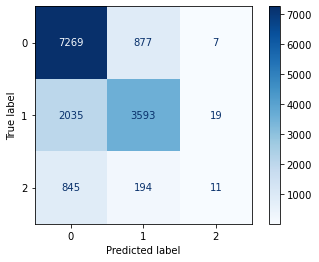

Where 0=functional, 1=nonfunctional, 2=functional needs repair
              precision    recall  f1-score   support

           0       0.72      0.89      0.79      8153
           1       0.77      0.64      0.70      5647
           2       0.30      0.01      0.02      1050

    accuracy                           0.73     14850
   macro avg       0.59      0.51      0.50     14850
weighted avg       0.71      0.73      0.70     14850

Accuracy Score (Train):  73.31%
Accuracy Score (Test):  73.22%


In [122]:
# Confusion Matrix
plot_confusion_matrix(logreg, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()
print("Where 0=functional, 1=nonfunctional, 2=functional needs repair")

# Analysis
print(classification_report(y_test, y_hat_test))
print(f"Accuracy Score (Train): {accuracy_score(y_train, y_hat_train): .2%}")
print(f"Accuracy Score (Test): {accuracy_score(y_test, y_hat_test): .2%}")

#### Gaussian Naive Bayes

In [123]:
from sklearn.naive_bayes import GaussianNB

# Vanilla Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predictions
y_hat_train = gnb.predict(X_train)
y_hat_test = gnb.predict(X_test)

# Rough Analysis
print('MSE score:', mse(y_test, y_hat_test))
print('R-sq score:', r2_score(y_test, y_hat_test))
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)
print(f"Accuracy Score (Train): {accuracy_score(y_train, y_hat_train): .2%}")
print(f"Accuracy Score (Test): {accuracy_score(y_test, y_hat_test): .2%}")

MSE score: 1.9327946127946127
R-sq score: -3.943917223717304
Confusion Matrix:
 [[1301  687 6165]
 [ 375 2453 2819]
 [  28   49  973]]
Accuracy Score (Train):  32.94%
Accuracy Score (Test):  31.83%


In [124]:
#GridSearch
gnb_param_grid = {
    'var_smoothing': [10, 2, 1, 1e-1, 1e-3, 1e-5, 1e-7, 1e-9, 1e-10]
}

gnb_grid_search = GridSearchCV(gnb, gnb_param_grid, cv=3, return_train_score=True)
gnb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': [10, 2, 1, 0.1, 0.001, 1e-05, 1e-07,
                                           1e-09, 1e-10]},
             return_train_score=True)

In [125]:
# Mean training score
gnb_gs_training_score = np.mean(gnb_grid_search.cv_results_['mean_train_score'])

# Mean test score
gnb_gs_testing_score = gnb_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {gnb_gs_training_score :.2%}")
print(f"Mean Test Score: {gnb_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
gnb_grid_search.best_params_

Mean Training Score: 48.16%
Mean Test Score: 69.32%
Best Parameter Combination Found During Grid Search:


{'var_smoothing': 1}

In [126]:
# New Model
gnb_ = GaussianNB(var_smoothing=1)
gnb_.fit(X_train, y_train)

# Predictions
y_hat_train = gnb_.predict(X_train)
y_hat_test = gnb_.predict(X_test)

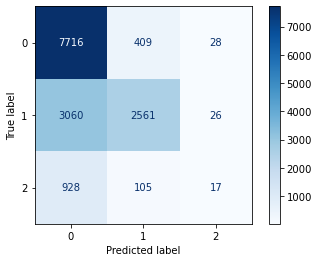

Where 0=functional, 1=nonfunctional, 2=functional needs repair
              precision    recall  f1-score   support

           0       0.66      0.95      0.78      8153
           1       0.83      0.45      0.59      5647
           2       0.24      0.02      0.03      1050

    accuracy                           0.69     14850
   macro avg       0.58      0.47      0.46     14850
weighted avg       0.70      0.69      0.65     14850

Accuracy Score (Train):  68.77%
Accuracy Score (Test):  69.32%


In [127]:
# Confusion Matrix
plot_confusion_matrix(gnb_, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()
print("Where 0=functional, 1=nonfunctional, 2=functional needs repair")
# Analysis
print(classification_report(y_test, y_hat_test))
print(f"Accuracy Score (Train): {accuracy_score(y_train, y_hat_train): .2%}")
print(f"Accuracy Score (Test): {accuracy_score(y_test, y_hat_test): .2%}")

#### Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier

# Vanilla Model
dt = DecisionTreeClassifier(random_state=10)  
dt.fit(X_train, y_train)

# Predictions
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

print('MSE score:', mse(y_test, y_hat_test))
print('R-sq score:', r2_score(y_test, y_hat_test))
dt_cv_score = cross_val_score(dt, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)
print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)
print(f"Accuracy Score (Train): {accuracy_score(y_train, y_hat_train): .2%}")
print(f"Accuracy Score (Test): {accuracy_score(y_test, y_hat_test): .2%}")

MSE score: 0.3890909090909091
R-sq score: 0.0047399582384997085
Mean Cross Validation Score: 75.52%
Confusion Matrix:
 [[7117  867  169]
 [1511 4045   91]
 [ 610  193  247]]
Accuracy Score (Train):  84.12%
Accuracy Score (Test):  76.83%


In [138]:
#Gridsearch
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             return_train_score=True)

In [139]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 71.60%
Mean Test Score: 76.76%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

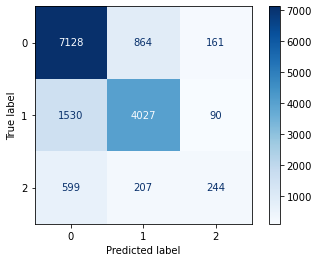

Where 0=functional, 1=nonfunctional, 2=functional needs repair
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      8153
           1       0.79      0.71      0.75      5647
           2       0.49      0.23      0.32      1050

    accuracy                           0.77     14850
   macro avg       0.68      0.61      0.63     14850
weighted avg       0.76      0.77      0.76     14850

Accuracy Score (Train):  82.47%
Accuracy Score (Test):  76.76%


In [130]:
# New Model
dt_ = DecisionTreeClassifier(random_state=10, criterion='entropy', 
                            max_depth=None, min_samples_leaf=1, 
                            min_samples_split=10)  
dt_.fit(X_train, y_train)

# Predictions
y_hat_train = dt_.predict(X_train)
y_hat_test = dt_.predict(X_test)

# Confusion Matrix
plot_confusion_matrix(dt_, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()
print("Where 0=functional, 1=nonfunctional, 2=functional needs repair")
# Analysis
print(classification_report(y_test, y_hat_test))
print(f"Accuracy Score (Train): {accuracy_score(y_train, y_hat_train): .2%}")
print(f"Accuracy Score (Test): {accuracy_score(y_test, y_hat_test): .2%}")

#### Ensemble Trees

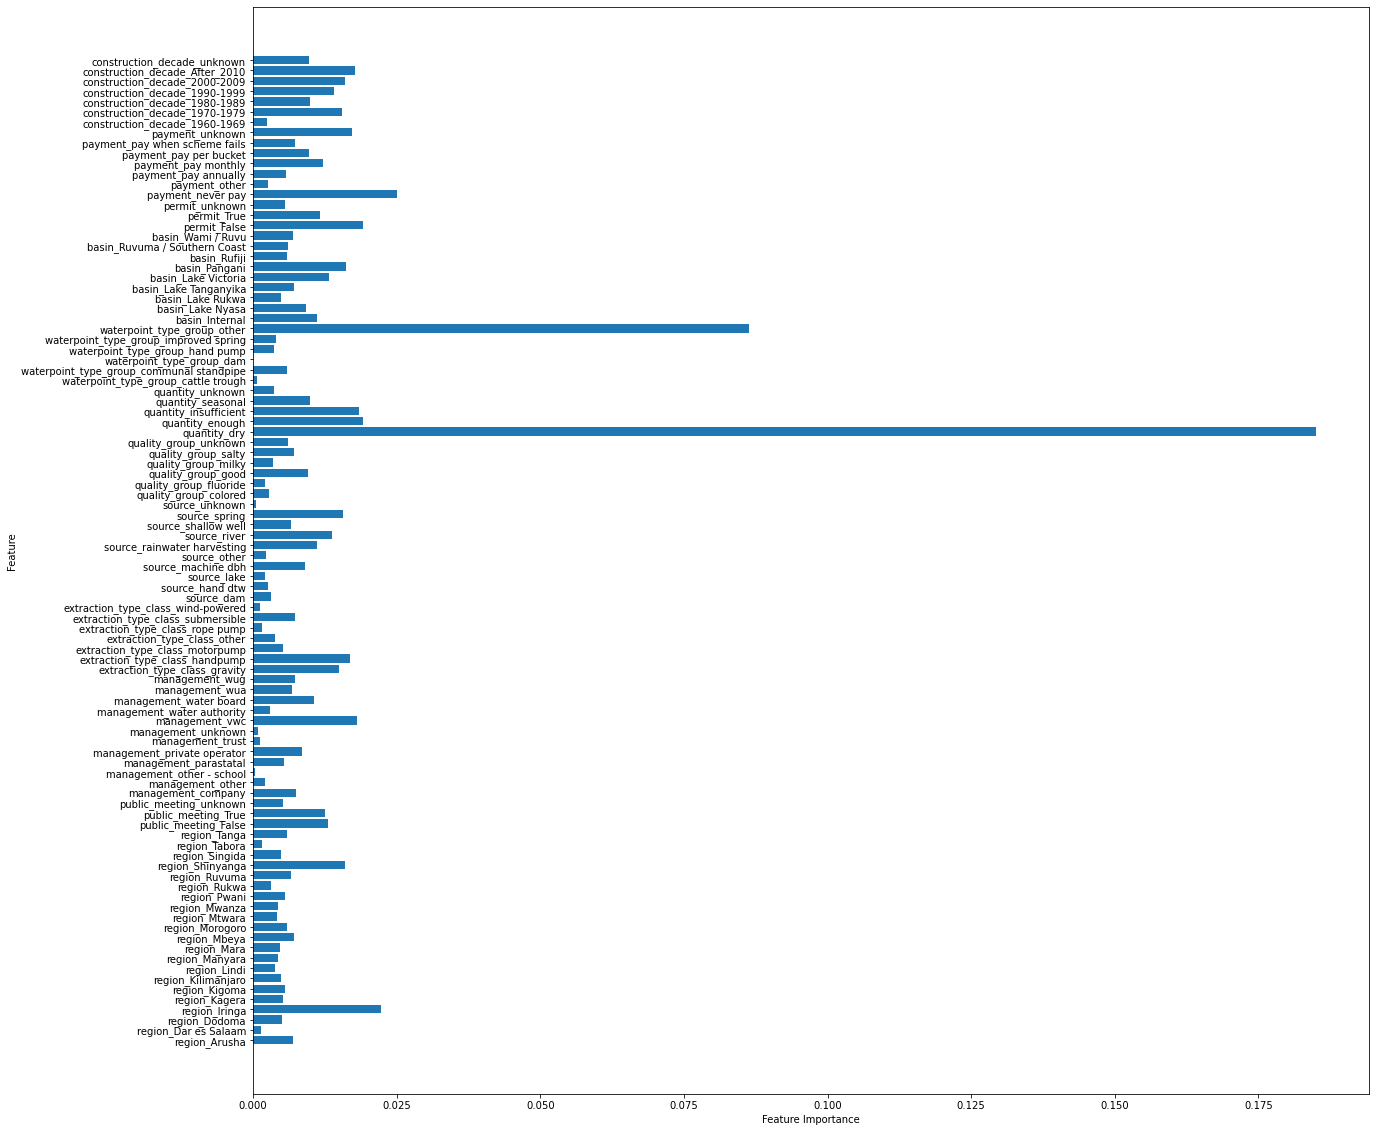

In [132]:
plot_feature_importances(dt_)

Bagged Tree

In [140]:
# Vanilla Model
from sklearn.ensemble import BaggingClassifier
bt =  BaggingClassifier(dt)
bt.fit(X_train, y_train)

# Predictions
y_hat_train = bt.predict(X_train)
y_hat_test = bt.predict(X_test)

print('MSE score:', mse(y_test, y_hat_test))
print('R-sq score:', r2_score(y_test, y_hat_test))
bt_cv_score = cross_val_score(bt, X_train, y_train, cv=3)
mean_bt_cv_score = np.mean(bt_cv_score)
print(f"Mean Cross Validation Score: {mean_bt_cv_score :.2%}")
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)
print(f"Accuracy Score (Train): {accuracy_score(y_train, y_hat_train): .2%}")
print(f"Accuracy Score (Test): {accuracy_score(y_test, y_hat_test): .2%}")

MSE score: 0.38491582491582493
R-sq score: 0.015419453321437238
Mean Cross Validation Score: 76.02%
Confusion Matrix:
 [[7117  870  166]
 [1425 4120  102]
 [ 615  195  240]]
Accuracy Score (Train):  83.80%
Accuracy Score (Test):  77.29%


Random Forest

In [145]:
# Vanilla Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

print('MSE score:', mse(y_test, y_hat_test))
print('R-sq score:', r2_score(y_test, y_hat_test))
rf_cv_score = cross_val_score(rf, X_train, y_train, cv=3)
mean_rf_cv_score = np.mean(rf_cv_score)
print(f"Mean Cross Validation Score: {mean_rf_cv_score :.2%}")
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)
print(f"Accuracy Score (Train): {accuracy_score(y_train, y_hat_train): .2%}")
print(f"Accuracy Score (Test): {accuracy_score(y_test, y_hat_test): .2%}")

MSE score: 0.37912457912457914
R-sq score: 0.030232946500995728
Mean Cross Validation Score: 76.69%
Confusion Matrix:
 [[7095  874  184]
 [1392 4170   85]
 [ 586  199  265]]
Accuracy Score (Train):  84.12%
Accuracy Score (Test):  77.64%


In [146]:
# GridSearch
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 6, 10],
                         'min_samples_leaf': [3, 6],
                         'min_samples_split': [5, 10],
                         'n_estimators': [10, 30, 100]})

In [148]:
# Mean training score
rf_gs_training_score = rf_grid_search.score(X_train, y_train)

# Mean test score
rf_gs_testing_score = rf_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {rf_gs_training_score :.2%}")
print(f"Mean Test Score: {rf_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
rf_grid_search.best_params_

Mean Training Score: 80.04%
Mean Test Score: 77.83%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

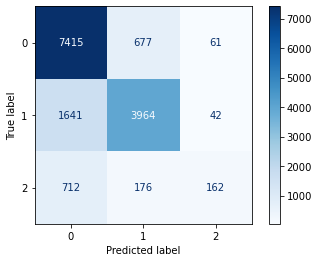

Where 0=functional, 1=nonfunctional, 2=functional needs repair
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      8153
           1       0.82      0.70      0.76      5647
           2       0.61      0.15      0.25      1050

    accuracy                           0.78     14850
   macro avg       0.73      0.59      0.61     14850
weighted avg       0.77      0.78      0.76     14850

Accuracy Score (Train):  80.02%
Accuracy Score (Test):  77.72%


In [149]:
# New Model
rf_ = RandomForestClassifier(criterion='entropy', max_depth=None,
                             min_samples_leaf=3, min_samples_split=5,
                             n_estimators=100)  
rf_.fit(X_train, y_train)

# Predictions
y_hat_train = rf_.predict(X_train)
y_hat_test = rf_.predict(X_test)

# Confusion Matrix
plot_confusion_matrix(rf_, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()
print("Where 0=functional, 1=nonfunctional, 2=functional needs repair")
# Analysis
print(classification_report(y_test, y_hat_test))
print(f"Accuracy Score (Train): {accuracy_score(y_train, y_hat_train): .2%}")
print(f"Accuracy Score (Test): {accuracy_score(y_test, y_hat_test): .2%}")

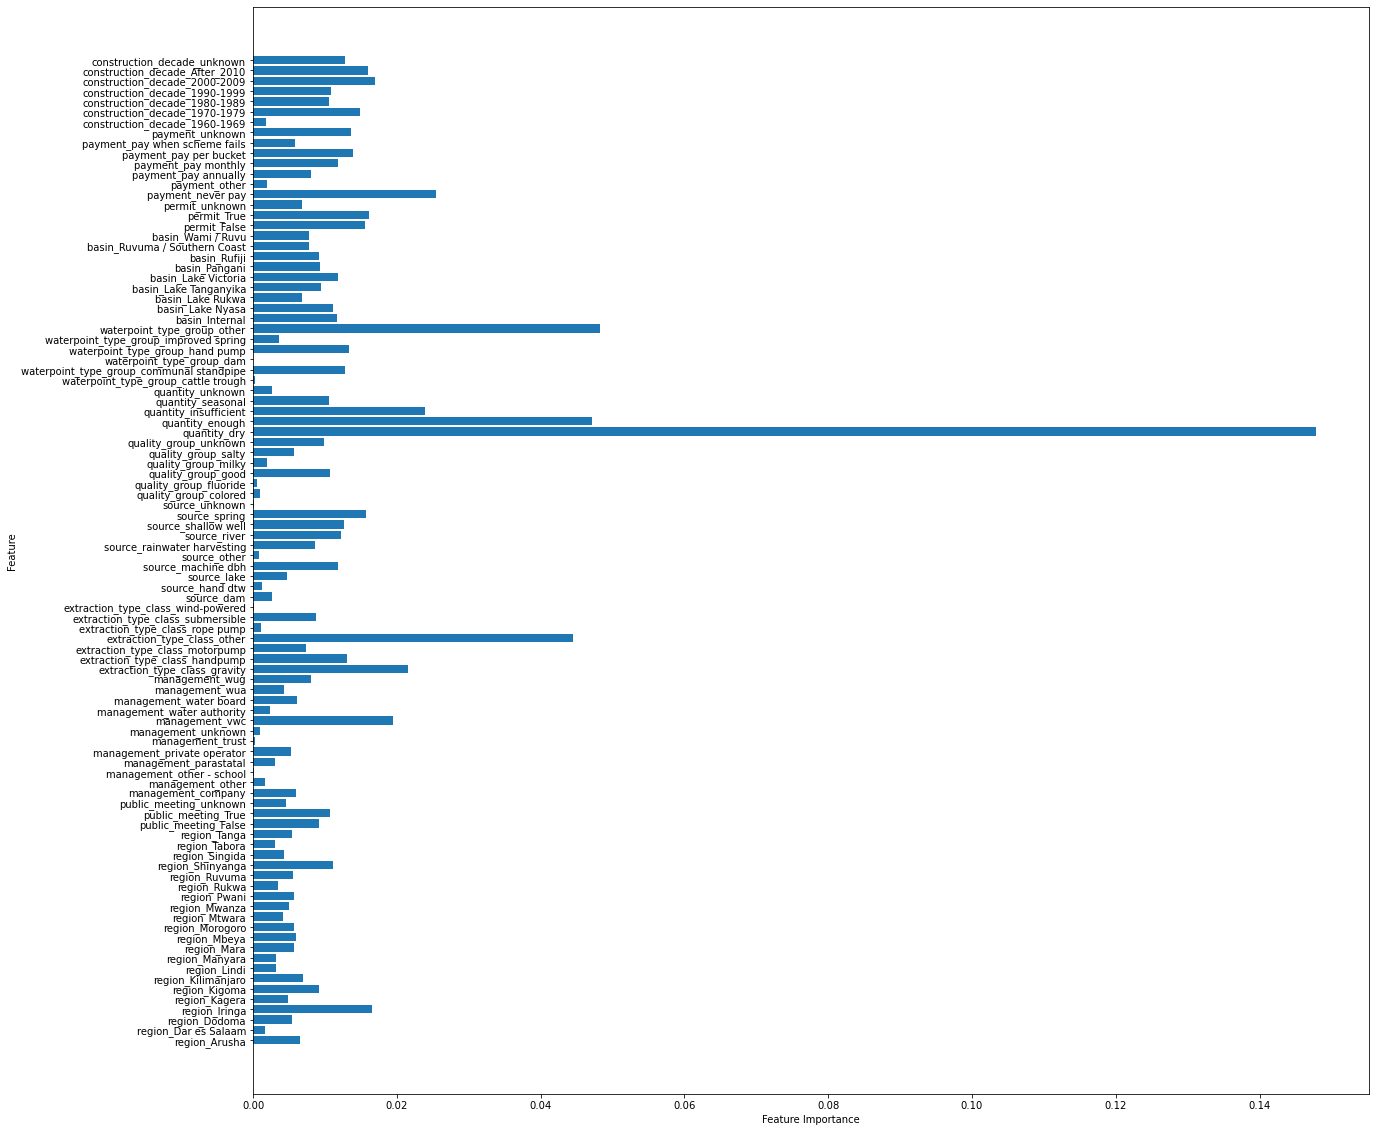

In [150]:
plot_feature_importances(rf_)

#### XGBOOST

In [151]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

clf = XGBClassifier()
clf.fit(X_train, y_train)

# Predictions
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

print('MSE score:', mse(y_test, y_hat_test))
print('R-sq score:', r2_score(y_test, y_hat_test))
clf_cv_score = cross_val_score(clf, X_train, y_train, cv=3)
mean_clf_cv_score = np.mean(clf_cv_score)
print(f"Mean Cross Validation Score: {mean_clf_cv_score :.2%}")
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)
print(f"Accuracy Score (Train): {accuracy_score(y_train, y_hat_train): .2%}")
print(f"Accuracy Score (Test): {accuracy_score(y_test, y_hat_test): .2%}")

[07:21:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
MSE score: 0.37831649831649833
R-sq score: 0.032299945549306264
[07:21:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:21:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:21:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogl

In [153]:
clf_param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

grid_clf = GridSearchCV(clf, clf_param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

[07:25:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:25:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:25:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:25:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[07:29:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:29:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:29:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:30:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=1,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                                     tre

In [157]:
# Mean training score
clf_gs_training_score = grid_clf.score(X_train, y_train)

# Mean test score
clf_gs_testing_score = grid_clf.score(X_test, y_test)

print(f"Mean Training Score: {clf_gs_training_score :.2%}")
print(f"Mean Test Score: {clf_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
grid_clf.best_params_

Mean Training Score: 78.79%
Mean Test Score: 77.56%
Best Parameter Combination Found During Grid Search:


{'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.7}

[07:36:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


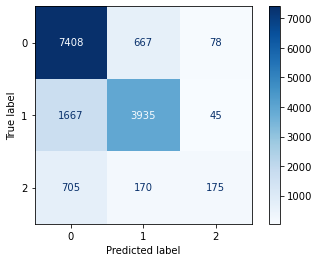

Where 0=functional, 1=nonfunctional, 2=functional needs repair
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      8153
           1       0.82      0.70      0.76      5647
           2       0.59      0.17      0.26      1050

    accuracy                           0.78     14850
   macro avg       0.72      0.59      0.61     14850
weighted avg       0.77      0.78      0.76     14850

Accuracy Score (Train):  78.79%
Accuracy Score (Test):  77.56%


In [158]:
# New Model
clf_ = XGBClassifier(learning_rate=0.2, max_depth=6,
                     min_child_weight=1, n_estimators=100,
                     subsample=0.7)  
clf_.fit(X_train, y_train)

# Predictions
y_hat_train = clf_.predict(X_train)
y_hat_test = clf_.predict(X_test)

# Confusion Matrix
plot_confusion_matrix(clf_, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()
print("Where 0=functional, 1=nonfunctional, 2=functional needs repair")
# Analysis
print(classification_report(y_test, y_hat_test))
print(f"Accuracy Score (Train): {accuracy_score(y_train, y_hat_train): .2%}")
print(f"Accuracy Score (Test): {accuracy_score(y_test, y_hat_test): .2%}")

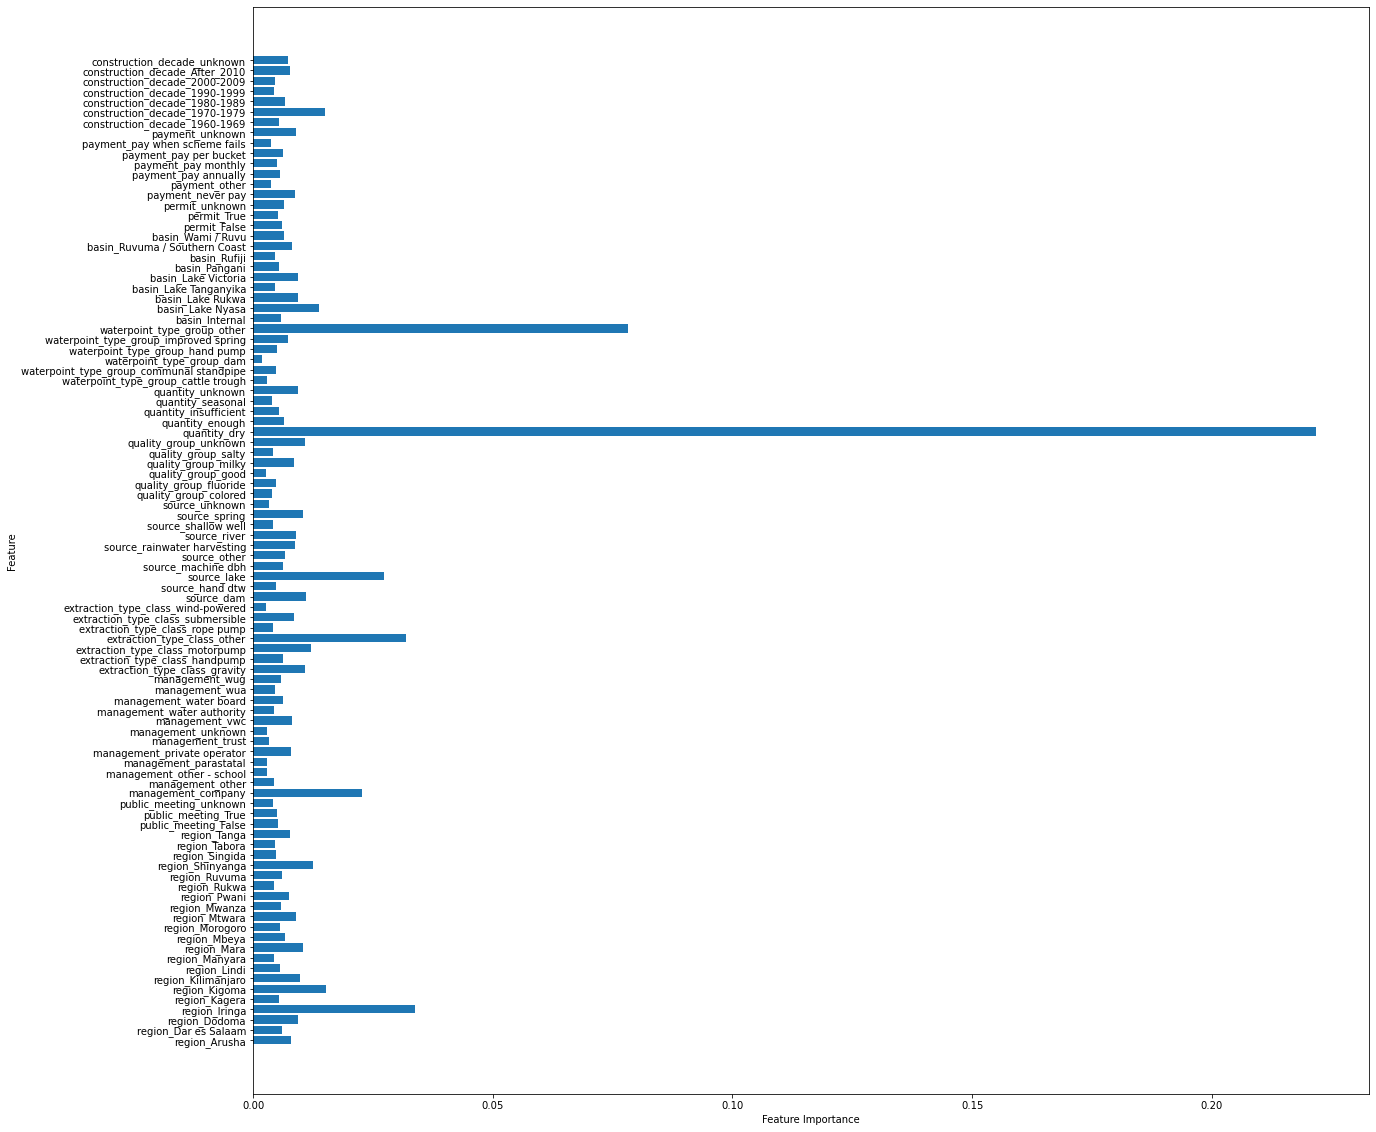

In [159]:
plot_feature_importances(clf_)

# Conclusion